# PYTHON GIS
https://automating-gis-processes.github.io/site/lessons/L1/Intro-Python-GIS.html

- Read / write spatial data from/to different file formats
- Deal with different projections
- Do different geometric operations and geocoding
- Reclassify your data based on different criteria
- Do spatial queries
- Do simple spatial analyses
- Visualize data and create (interactive) maps

## Useful libraries

### Data analysis & visualization:
- Numpy –> Fundamental package for scientific computing with Python
- Pandas –> High-performance, easy-to-use data structures and data analysis tools
- Scipy –> A collection of numerical algorithms and domain-specific toolboxes, including signal processing, optimization and statistics
- Matplotlib –> Basic plotting library for Python
- Bokeh –> Interactive visualizations for the web (also maps)
- Plotly –> Interactive visualizations (also maps) for the web (commercial - free for educational purposes)
### GIS:
- GDAL –> Fundamental package for processing vector and raster data formats (many modules below depend on this). Used for raster processing.
- Geopandas –> Working with geospatial data in Python made easier, combines the capabilities of pandas and shapely.
- Shapely –> Python package for manipulation and analysis of planar geometric objects (based on widely deployed GEOS).
- Fiona –> Reading and writing spatial data (alternative for geopandas).
- Pyproj –> Performs cartographic transformations and geodetic computations (based on PROJ.4).
- Pysal –> Library of spatial analysis functions written in Python.
- Geopy –> Geocoding library: coordinates to address <-> address to coordinates.
- Contextily –> Add background basemaps for your (static) map visualizations
- GeoViews –> Interactive Maps for the web.
- Geoplot –> High-level geospatial data visualization library for Python.
- Dash –> Dash is a Python framework for building analytical web applications.
- OSMnx –> Python for street networks. Retrieve, construct, analyze, and visualize street networks from OpenStreetMap
- Networkx –> Network analysis and routing in Python (e.g. Dijkstra and A* -algorithms), see this post.
- Cartopy –> Make drawing maps for data analysis and visualisation as easy as possible.
- Scipy.spatial –> Spatial algorithms and data structures.
- Rtree –> Spatial indexing for Python for quick spatial lookups.
- Rasterio –> Clean and fast and geospatial raster I/O for Python.
- RSGISLib –> Remote Sensing and GIS Software Library for Python.

## Shapely and Geometric Objects

- Overview of Geometric Objects and Shapely -module
- Point -object
- LineString -object
- Polygon -object
- Geometry collections

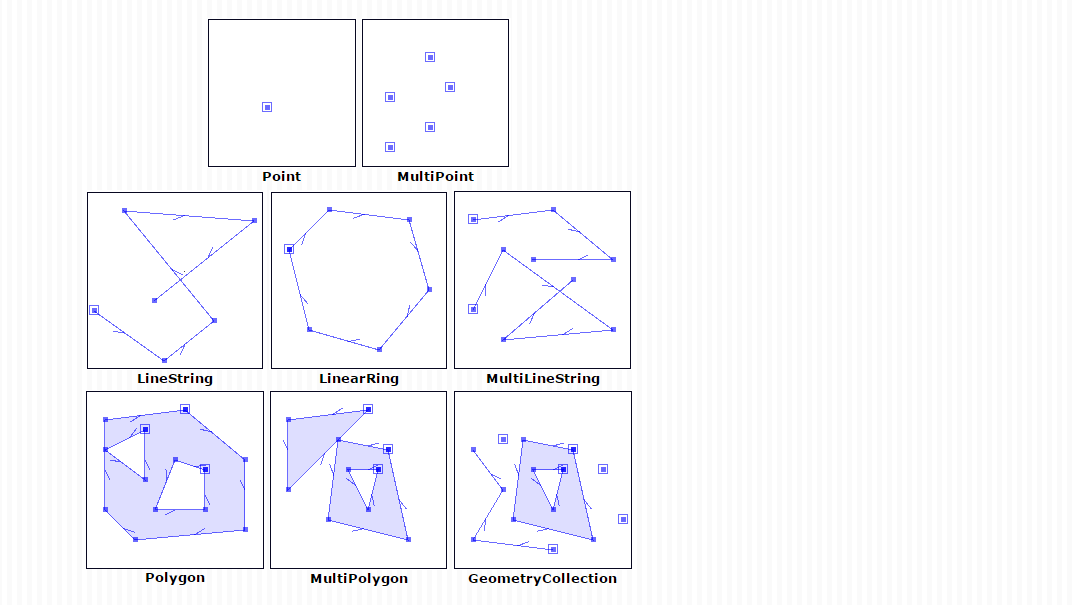

## Point

In [1]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)

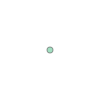

In [2]:
point1

In [6]:
print(point1)
print(point3D)
type(point1)
point1.geom_type

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


'Point'

In [7]:
# Calculate the distance between point1 and point2
point_dist = point1.distance(point2)

print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))

Distance between the points is 29.72 decimal degrees


## Linestring

In [8]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

# It is also possible to produce the same outcome using coordinate tuples
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

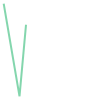

In [9]:
line

In [12]:
# Get x and y coordinates of the line
lxy = line.xy
print(lxy)
print(lxy[0])
print(lxy[1])

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))
array('d', [2.2, 7.2, 9.26])
array('d', [4.2, -25.1, -2.456])


In [13]:
# Get the lenght of the line
l_length = line.length

# Get the centroid of the line
l_centroid = line.centroid

# Print the outputs
print("Length of our line: {0:.2f}".format(l_length))
print("Centroid of our line: ", l_centroid)
print("Type of the centroid:", type(l_centroid))

Length of our line: 52.46
Centroid of our line:  POINT (6.229961354035622 -11.89241115757239)
Type of the centroid: <class 'shapely.geometry.point.Point'>


## Polygon

In [14]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# It is also possible to produce the same outcome using a list of lists which contain the point coordinates.
# We can do this using the point objects we created before and a list comprehension:
# --> here, we pass a list of lists as input when creating the Polygon (the linst comprehension generates this list: [[2.2, 4.2], [7.2, -25.1], [9.26, -2.456]]):
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])

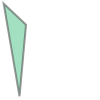

In [15]:
poly

In [16]:
#Create polygon with a hole
# First we define our exterior
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

# Let's create a single big hole where we leave ten decimal degrees at the boundaries of the world
# Notice: there could be multiple holes, thus we need to provide a list of holes
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

# World without a hole
world = Polygon(shell=world_exterior)

# Now we can construct our Polygon with the hole inside
world_has_a_hole = Polygon(shell=world_exterior, holes=hole)

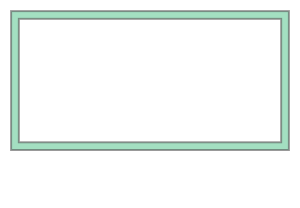

In [17]:
world_has_a_hole

In [18]:
print("Poly centroid: ", world.centroid)
print("Poly Area: ", world.area)
print("Poly Bounding Box: ", world.bounds)
print("Poly Exterior: ", world.exterior)
print("Poly Exterior Length: ", world.exterior.length)

Poly centroid:  POINT (-0 -0)
Poly Area:  64800.0
Poly Bounding Box:  (-180.0, -90.0, 180.0, 90.0)
Poly Exterior:  LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Poly Exterior Length:  1080.0


## Geometery Collections